In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
# from scipy.optimize import curve_fit
# from scipy.stats import norm
import matplotlib.mlab as mlab
# from pylab import rcParams
#import seaborn as sns
#sns.set()


# from root_numpy import root2array, tree2array,testdata
# from root_pandas import read_root
# from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
# from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
myfile_beam_off='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_davidc_lowthreshold_EXTC1C2_hadd_hist.root'
myfile_beam_on='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_davidc_lowthreshold_5E19_hadd_hist.root'
myfile_Overlay='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_davidc_lowthreshold_OVERLAY_hadd_hist.root'

In [4]:
folder = "gamma3d"
folder_corr= 'gammacorrelation'
folder_truth='TruthStudies'

TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"
TREE_SPS="Sps_Correlationtree"
TREE_EVENT="Event_Correlationtree"
TREE_EVENT_TRUTH="Eventtree"
TREE_MCPARTICLE_TRUTH="MCParticletree"
TREE_HIT="Hittree"
TREE_POT="potTree"

# BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
# BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'

In [5]:
# NUSELECTION_event = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and muon_pz>0.7'# and cosmic_trk_50==0 and muon_pz>0.7'# and Event_cluster_charge>5 and sps_cluster_charge10>5 and sps_cluster_charge20>5 and sps_cluster_charge50>5' # and tracklength>20 and distance_nu_smallest>15'
NUSELECTION_sps = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and muon_pz>0.7'# and cosmic_trk_50==0 and muon_pz>0.7'# and sps_cluster_charge>5 ' # and tracklength>20 and distance_nu_smallest>15'
# NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0 and muon_pz>0.7 ' # and tracklength>20 and distance_nu_smallest>15'

In [6]:
# df_Event_beam_on=uproot.open(myfile_beam_on)[folder_corr][TREE_EVENT]
df_Sps_beam_on=uproot.open(myfile_beam_on)[folder_corr][TREE_SPS]

# df_Event_beam_on=pd.DataFrame(root2array( myfile_beam_on,BRANCH_EVT))
# df_Sps_beam_on=pd.DataFrame(root2array( myfile_beam_on,BRANCH_SPS))

# print(len(df_Event_beam_on))

# df_Event_beam_on = df_Event_beam_on.pandas.df().query(NUSELECTION_event)
df_Sps_beam_on = df_Sps_beam_on.pandas.df().query(NUSELECTION_sps)


# print(len(df_Event_beam_on))


In [7]:
# df_Event_beam_off=uproot.open(myfile_beam_off)[folder_corr][TREE_EVENT]
df_Sps_beam_off=uproot.open(myfile_beam_off)[folder_corr][TREE_SPS]

# df_Event_beam_off=pd.DataFrame(root2array( myfile_beam_off,BRANCH_EVT))
# df_Sps_beam_off=pd.DataFrame(root2array( myfile_beam_off,BRANCH_SPS))
# print(len(df_Event_beam_off))

# df_Event_beam_off = df_Event_beam_off.pandas.df().query(NUSELECTION_event)
df_Sps_beam_off = df_Sps_beam_off.pandas.df().query(NUSELECTION_sps)

# print(len(df_Event_beam_off))


In [8]:
# df_Event_overlay=uproot.open(myfile_Overlay)[folder_corr][TREE_EVENT]
df_Sps_overlay=uproot.open(myfile_Overlay)[folder_corr][TREE_SPS]

# df_Event_beam_overlay=pd.DataFrame(root2array( myfile_beam_Overlay,BRANCH_EVT))
# df_Sps_beam_overlay=pd.DataFrame(root2array( myfile_beam_Overlay,BRANCH_SPS))


# print(len(df_Event_overlay))

# df_Event_overlay = df_Event_overlay.pandas.df().query(NUSELECTION_event)
df_Sps_overlay = df_Sps_overlay.pandas.df().query(NUSELECTION_sps)

# print(len(df_Event_overlay))


In [9]:
# df_Event_beam_off.head()

In [10]:
df_POT_MC =uproot.open(myfile_Overlay)[folder_corr][TREE_POT]
df_POT_MC = df_POT_MC.pandas.df()
df_POT_MC.head()
POT_OVERLAY = np.sum(df_POT_MC['sr_pot'].values)
print POT_OVERLAY

1.271096180771032e+20


In [12]:
# This info provided by David C.

BNB_POT= 4.54E19
BNB_triggers=10080350.0
C1_triggers=33682387.0
C2_triggers=31816420.0
C1_C2_triggers=C1_triggers+C2_triggers
print C1_C2_triggers
#The off-beam normalization is = [BNB #triggers] / [EXT #triggers]
off_scaling=(BNB_triggers/C1_C2_triggers)
print off_scaling
#0.1539012764
#The overlay normalization is = [BNB POT] / [Overlay POT]
overlay_scaling=(BNB_POT/POT_OVERLAY)
print(overlay_scaling)
#0.35719987283306953

# off_scaling=0.15456674775




# overlay_scaling=0.1621211




65498807.0
0.1539012764
0.35717202747364796


In [13]:
# BINS = np.linspace(0,1.,50)

# fig = plt.figure(figsize=(8,8))

# binv, bine = np.histogram(df_Sps_beam_off['distance_rand_vtx'].values/100,bins=BINS)
# binc = (0.5)*(bine[1:]+bine[:-1])
# binv = binv.astype(float) 
# errors = np.sqrt(binv)
# NEVTS = df_Event_beam_off.shape[0]
# binv /= NEVTS
# errors /= NEVTS
# plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

# plt.show()


# BINWIDTH = binc[1]-binc[0]


In [14]:
# def fun(x,c):
#     return 4*pi*x*x*c*BINWIDTH
# f2 = np.vectorize(fun)
# fun(1.,1)

In [15]:
# guess = [0.60]

In [16]:
# xvals = np.linspace(bine[0],bine[-1],100)

In [17]:
# popt,popv = curve_fit(f2,binc,binv,p0=guess)

In [18]:
# print popt

In [19]:
# fig = plt.figure(figsize=(10,6))
# plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)
# plt.plot(xvals,f2(xvals,*popt),'b--',lw=4,label='$4 \pi r^2 \Delta r \\rho $ \n $\\rho$ : %.02f spacepoints / $m^3$'%(popt[0]))
# plt.grid()
# plt.xlabel('Distance (meters)')
# plt.ylabel('Entries')
# plt.title("Distance between a random vertex and 3-D SpacePoint")
# plt.legend(loc=2,fontsize=16)
# plt.show()
# fig.savefig('curve.png', dpi=500)

In [20]:
BINS = np.linspace(0,1100,110)

nOFF_Sps = len(df_Sps_beam_off)
weightsOFF_Sps = np.ones(nOFF_Sps) * off_scaling # factor needed to scale off-beam to on-beam

nOverlay_Sps = len(df_Sps_overlay)
weightsOverlay_Sps = np.ones(nOverlay_Sps) * overlay_scaling # factor needed to scale Overlay to on-beam

nON_Sps  = len(df_Sps_beam_on)
weightsON_Sps  = np.ones(nON_Sps) 


In [21]:
df_Sps_beam_off.head()

,evttime,sps_x,sps_y,sps_z,distance,distance_smallest_nu,sps_cluster_charge,N_Event,N_Run,N_SubRun,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_cosmic_smallest,cosmic_trk_50,pointdistance_trk_smallest,distance_trk_smallest
entry,,,,,,,,,,,,,,,,,,,,,
127936,1455186430,210.081619,-49.172871,1.728299,139.91086,140.579116,40.901707,573,4958,11,...,2,0.053574,0.433122,0.899742,204.45079,204.450798,7.364352,1,516.796726,85.681542
127937,1455186430,210.081619,-49.172871,1.728299,139.91086,140.579116,40.901707,573,4958,11,...,2,0.053574,0.433122,0.899742,204.45079,204.450798,7.364352,1,516.796726,85.681542
127938,1455186430,210.081619,-49.172871,1.728299,139.91086,140.579116,40.901707,573,4958,11,...,2,0.053574,0.433122,0.899742,204.45079,204.450798,7.364352,1,516.796726,85.681542
127939,1455186430,210.081619,-49.172871,1.728299,139.91086,140.579116,40.901707,573,4958,11,...,2,0.053574,0.433122,0.899742,204.45079,204.450798,7.364352,1,516.796726,85.681542
127940,1455186430,210.081619,-49.172871,1.728299,139.91086,140.579116,40.901707,573,4958,11,...,2,0.053574,0.433122,0.899742,204.45079,204.450798,7.364352,1,516.796726,85.681542


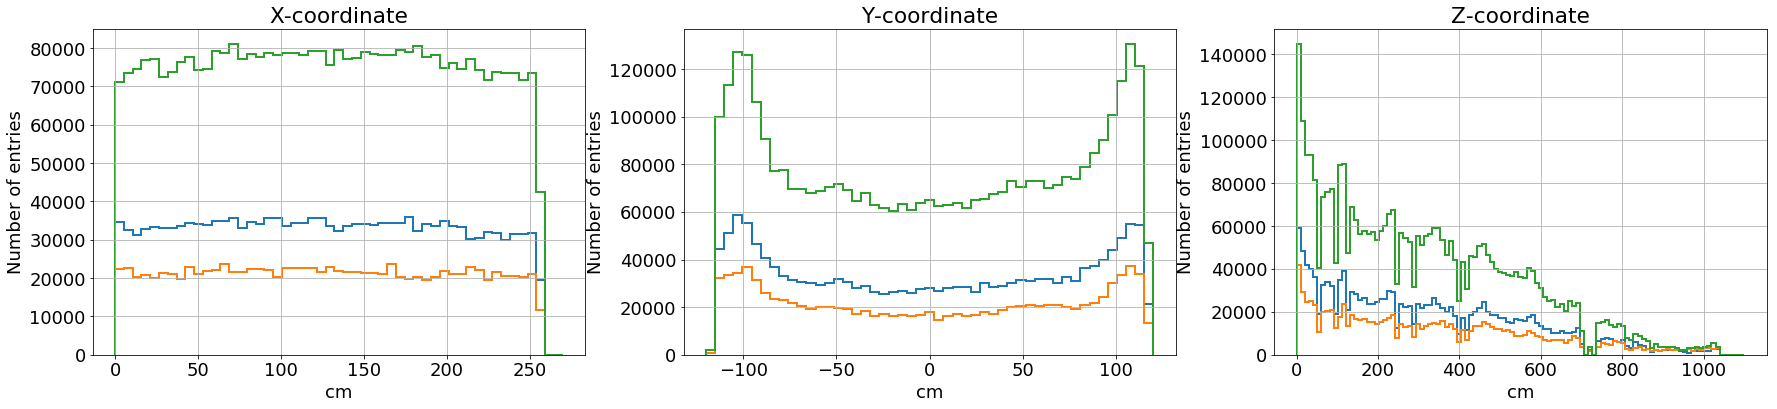

In [22]:
#MicroBooNE coordinates : x[0,256.35], y[-116.5,116.5], z[0,1036.8]

BINS = np.linspace(0,270,52)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)
plt.hist(df_Sps_beam_on['sps_x'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_beam_off['sps_x'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_overlay['sps_x'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("X-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 2)
BINS = np.linspace(-120,120,50)
plt.hist(df_Sps_beam_on['sps_y'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_beam_off['sps_y'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_overlay['sps_y'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Y-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 3)
BINS = np.linspace(0,1100,110)
plt.hist(df_Sps_beam_on['sps_z'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_beam_off['sps_z'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_overlay['sps_z'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Z-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

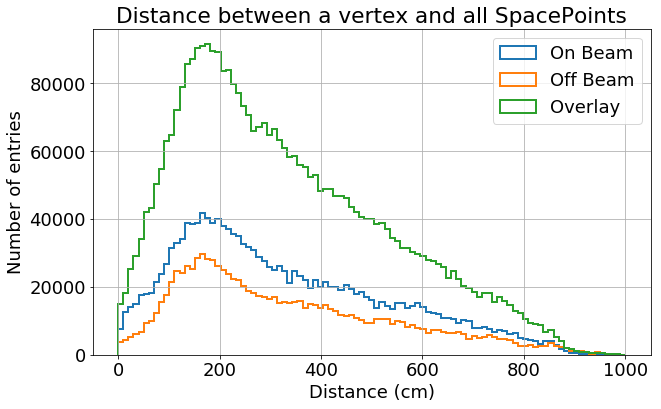

In [23]:
BINS = np.linspace(0,1000,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_on['distance'].values,bins=BINS,histtype='step',lw=2,label='On Beam')
plt.hist(df_Sps_beam_off['distance'].values,bins=BINS,histtype='step',lw=2,label='Off Beam')
plt.hist(df_Sps_overlay['distance'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.legend(loc=1)

plt.grid()
plt.title("Distance between a vertex and all SpacePoints")
plt.xlabel('Distance (cm)')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

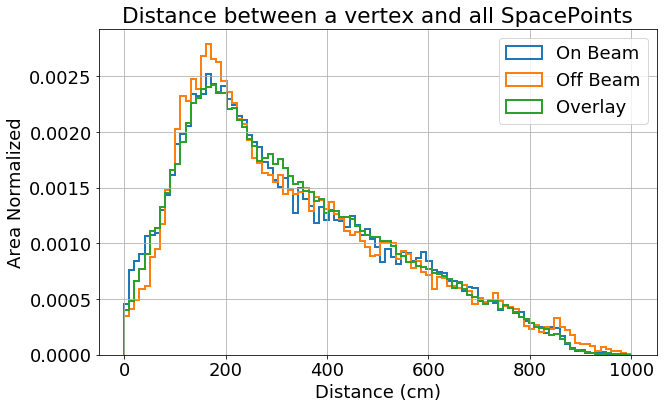

In [24]:
BINS = np.linspace(0,1000,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_on['distance'].values,bins=BINS,histtype='step',lw=2,label='On Beam',density=True)
plt.hist(df_Sps_beam_off['distance'].values,bins=BINS,histtype='step',lw=2,label='Off Beam',density=True)
plt.hist(df_Sps_overlay['distance'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.legend(loc=1)

plt.grid()
plt.title("Distance between a vertex and all SpacePoints")
plt.xlabel('Distance (cm)')
plt.ylabel('Area Normalized')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

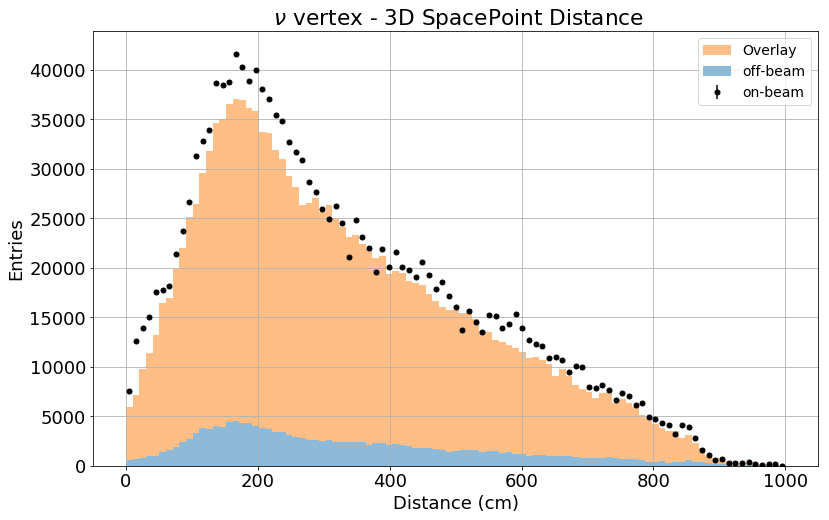

In [25]:
BINS = np.linspace(0,1000,100)


WEIGHTS_Sps = [weightsOFF_Sps,weightsOverlay_Sps]
fig = plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 18})

xstacked = [df_Sps_beam_off['distance'].values,df_Sps_overlay['distance'].values]
LABELS = ['off-beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Sps)
vals,bine = np.histogram(df_Sps_beam_on['distance'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=1,fontsize=14)
plt.show()




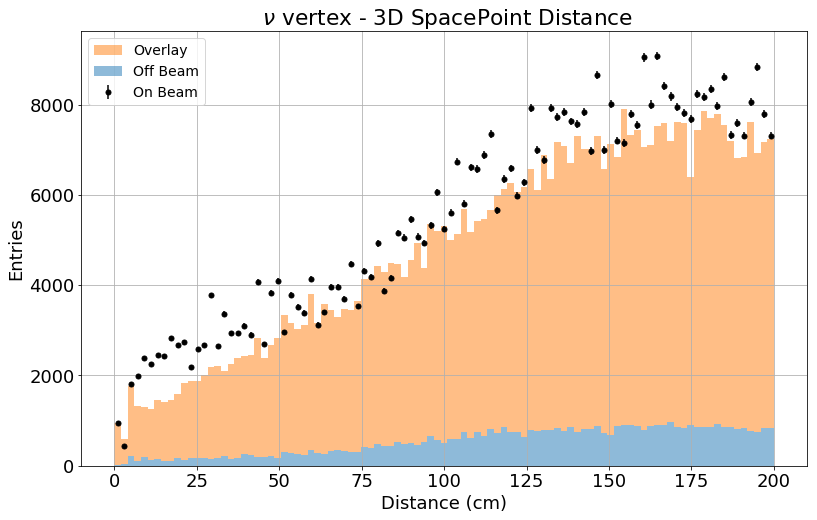

In [26]:
BINS = np.linspace(0,200,100)


WEIGHTS_Sps = [weightsOFF_Sps,weightsOverlay_Sps]
fig = plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 18})

xstacked = [df_Sps_beam_off['distance'].values,df_Sps_overlay['distance'].values]
LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Sps)
vals,bine = np.histogram(df_Sps_beam_on['distance'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='On Beam')
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=2,fontsize=14)
plt.show()
fig.savefig('distance_excess', dpi=500)

In [27]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

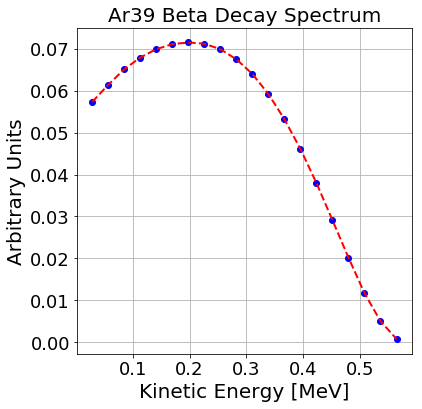

In [28]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

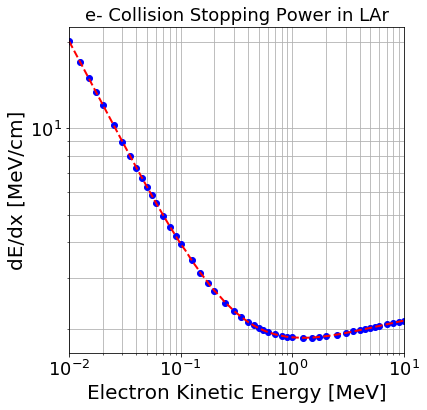

In [29]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

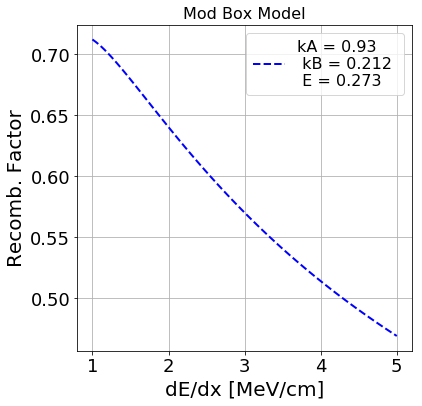

In [30]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

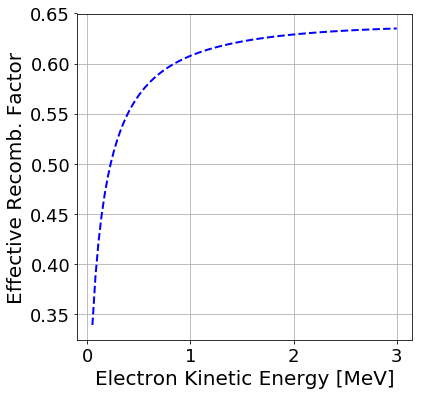

In [31]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



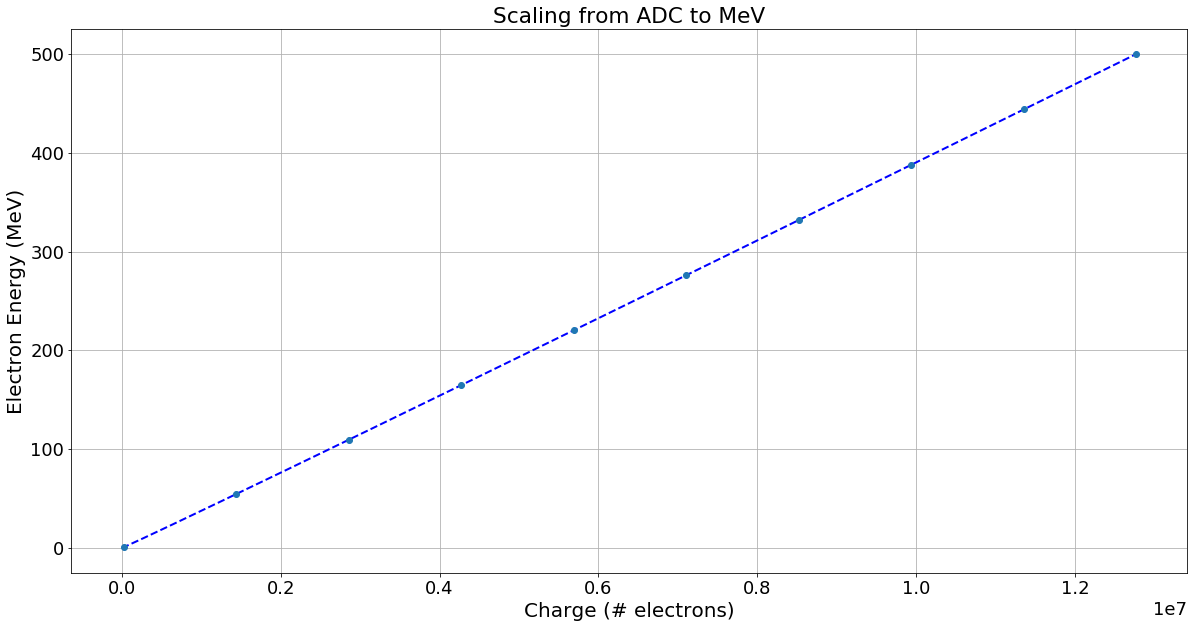

In [32]:
fig = plt.figure(figsize=(20,10))
Evals = np.linspace(0.001,500,500)
# Evals = np.linspace(0.001,30,500)

Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
print fQ2E
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
# fig.savefig('Q2E.png', dpi=300)
# print (fQ2E(1425.54 * 238.4))
# print (fQ2E(521.225 * 238.4))
# print (fQ2E(2108.16 * 238.4))
# print (fQ2E(2026.97 * 238.4))
# print (fQ2E(1280.97 * 238.4))
# print (fQ2E(321.1692 * 238.4))



In [33]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.239316323299


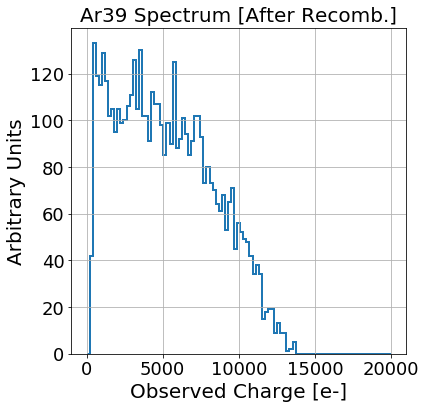

In [34]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [35]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

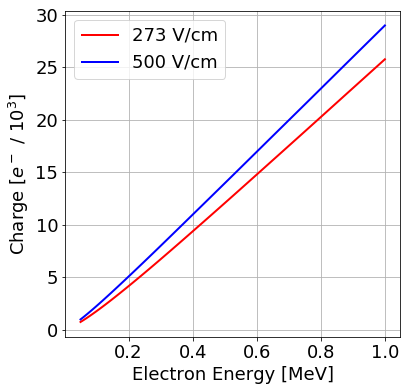

In [36]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [37]:
print Charge(0.2,0.273)


4129.221044959042


In [38]:
def E_recoY_off(df,gain):
    YQ_off = df['sps_cluster_charge50']
    QrecoY_off = YQ_off * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off = fQ2E(QrecoY_off)
    return ErecoY_off

def E_recoY_overlay(df,gain):
    YQ_overlay = df['sps_cluster_charge50']
    QrecoY_overlay = YQ_overlay * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_overlay = fQ2E(QrecoY_overlay)
    return ErecoY_overlay


def E_recoY_off_sps(df,gain):
    YQ_off_sps = df['sps_cluster_charge']
    QrecoY_off_sps = YQ_off_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_sps = fQ2E(QrecoY_off_sps)
    return ErecoY_off_sps

def E_recoY_on_sps(df,gain):
    YQ_on_sps = df['sps_cluster_charge']
    QrecoY_on_sps = YQ_on_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on_sps = fQ2E(QrecoY_on_sps)
    return ErecoY_on_sps

def E_recoY_overlay_sps(df,gain):
    YQ_overlay_sps = df['sps_cluster_charge']
    QrecoY_overlay_sps = YQ_overlay_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_overlay_sps = fQ2E(QrecoY_overlay_sps)
    return ErecoY_overlay_sps


def E_recoY_on(df,gain):
    YQ_on  = df['sps_cluster_charge50']
    QrecoY_on = YQ_on * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on = fQ2E(QrecoY_on)
    return ErecoY_on


In [39]:
df_sps_charge_50_off_sps=df_Sps_beam_off.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_off_sps['energy']=E_recoY_off_sps(df_sps_charge_50_off_sps,238.4)

df_sps_charge_50_on_sps=df_Sps_beam_on.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_on_sps['energy']=E_recoY_on_sps(df_sps_charge_50_on_sps,238.4)

df_sps_charge_50_overlay_sps=df_Sps_overlay.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_overlay_sps['energy']=E_recoY_overlay_sps(df_sps_charge_50_overlay_sps,238.4)


/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

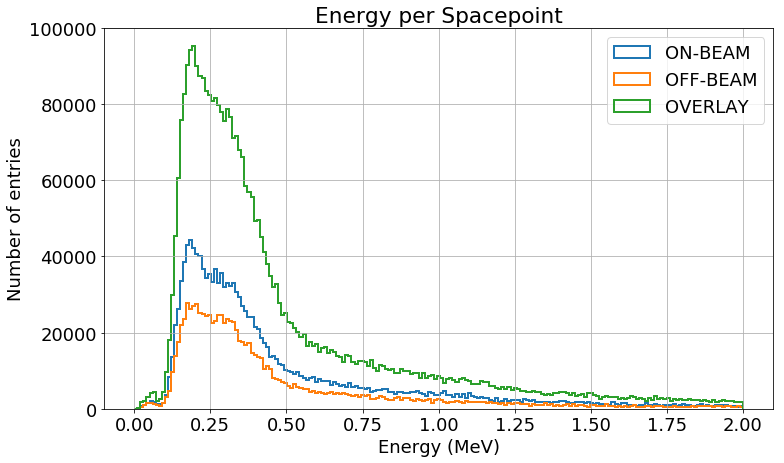

0.01169080383035858
0.014462308585518316
0.001787767010875375


In [40]:
BINS = np.linspace(0,2,200)

fig = plt.figure(figsize=(12,7))

plt.hist(df_sps_charge_50_on_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='ON-BEAM')

plt.hist(df_sps_charge_50_off_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='OFF-BEAM')

plt.hist(df_sps_charge_50_overlay_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='OVERLAY')

plt.legend(loc=1)

plt.grid()
plt.title("Energy per Spacepoint")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of entries')


plt.show()
# fig.savefig('Energy_run1_sps', dpi=400)
print(df_sps_charge_50_on_sps['energy'].min())
print(df_sps_charge_50_off_sps['energy'].min())
print(df_sps_charge_50_overlay_sps['energy'].min())

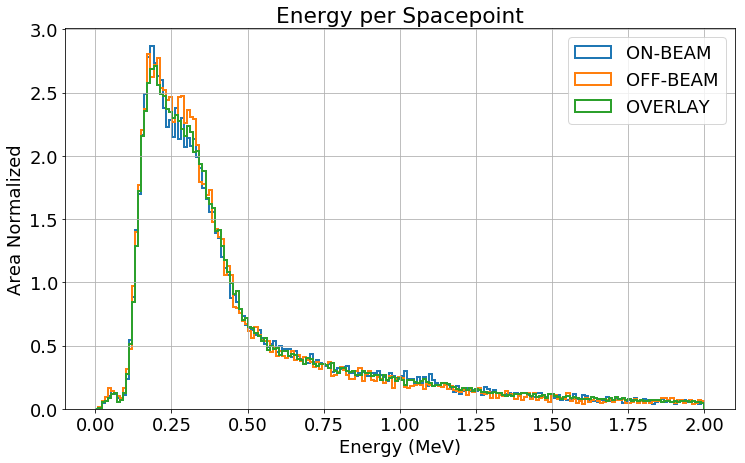

In [41]:
BINS = np.linspace(0,2,200)

fig = plt.figure(figsize=(12,7))

plt.hist(df_sps_charge_50_on_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='ON-BEAM',density=True)

plt.hist(df_sps_charge_50_off_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='OFF-BEAM',density=True)

plt.hist(df_sps_charge_50_overlay_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='OVERLAY',density=True)

plt.legend(loc=1)

plt.grid()
plt.title("Energy per Spacepoint")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')


plt.show()
